# Chapter 11

# 11.8.2. Goodness-of-fit tests for model validation

Fitted ka: 1.7425 1/hour
Fitted ke: 0.1331 1/hour


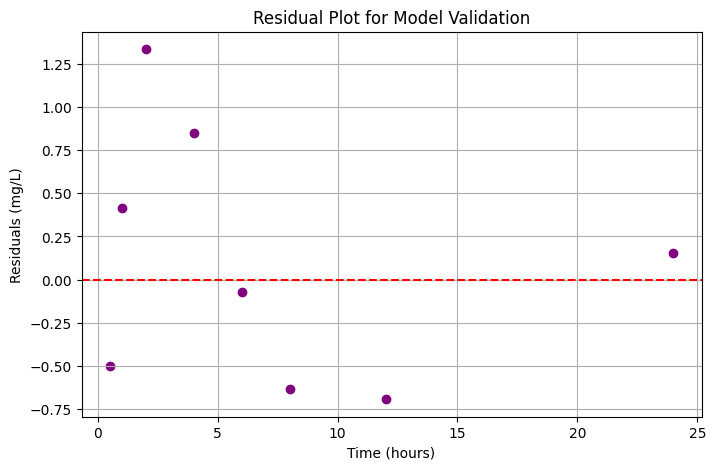

R-squared: 0.9431
Akaike Information Criterion (AIC): -1.8645
Corrected AIC (AICc): 0.5355


In [4]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Experimental data (time in hours, concentration in mg/L)
time_data = np.array([0.5, 1, 2, 4, 6, 8, 12, 24])
concentration_data = np.array([5.1, 8.0, 9.3, 7.2, 4.8, 3.1, 1.5, 0.6])

# Define the PK model for fitting
def pk_model(t, ka, ke):
    F = 1.0
    D = 500
    Vd = 50
    if ka == ke:
        return np.zeros_like(t)
    C = (F * D * ka) / (Vd * (ka - ke)) * (np.exp(-ke * t) - np.exp(-ka * t))
    return C

# Perform nonlinear regression to fit the model
initial_guesses = [1.0, 0.1]  # Initial guesses for ka and ke
params, covariance = curve_fit(pk_model, time_data, concentration_data, p0=initial_guesses)
ka_fitted, ke_fitted = params

print(f"Fitted ka: {ka_fitted:.4f} 1/hour")
print(f"Fitted ke: {ke_fitted:.4f} 1/hour")

# Predict concentrations using the fitted model
predicted_concentration = pk_model(time_data, ka_fitted, ke_fitted)

# Calculate residuals (observed - predicted)
residuals = concentration_data - predicted_concentration

# Calculate Residual Sum of Squares (RSS)
RSS = np.sum(residuals**2)

# Number of observations
n = len(concentration_data)

# Number of parameters (ka and ke)
k = 2

# Calculate AIC
AIC = n * np.log(RSS / n) + 2 * k

# Alternatively, you can calculate AICc (corrected AIC for small sample sizes)
AICc = AIC + (2 * k * (k + 1)) / (n - k - 1)

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(time_data, residuals, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Time (hours)')
plt.ylabel('Residuals (mg/L)')
plt.title('Residual Plot for Model Validation')
plt.grid(True)
plt.show()

# Calculate R-squared
r2 = r2_score(concentration_data, predicted_concentration)
print(f"R-squared: {r2:.4f}")

# Print AIC and AICc
print(f"Akaike Information Criterion (AIC): {AIC:.4f}")
print(f"Corrected AIC (AICc): {AICc:.4f}")
